In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import imutils
import random

In [4]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images'list with its'caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

In [2]:
def find_skeleton(image):

    params = []
    result = np.zeros(image.shape, np.uint8)

    se = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
    c = 0

    while True:
      if cv2.countNonZero(image)==0:
          break
      eroded = cv2.erode(image, se)
      opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, se)
      subtracted = cv2.subtract(eroded, opened)
      result = cv2.bitwise_or(result, subtracted)
      params.append((c, subtracted))
      image = eroded
      c += 1

    result = cv2.bitwise_not(result)
    return result, params

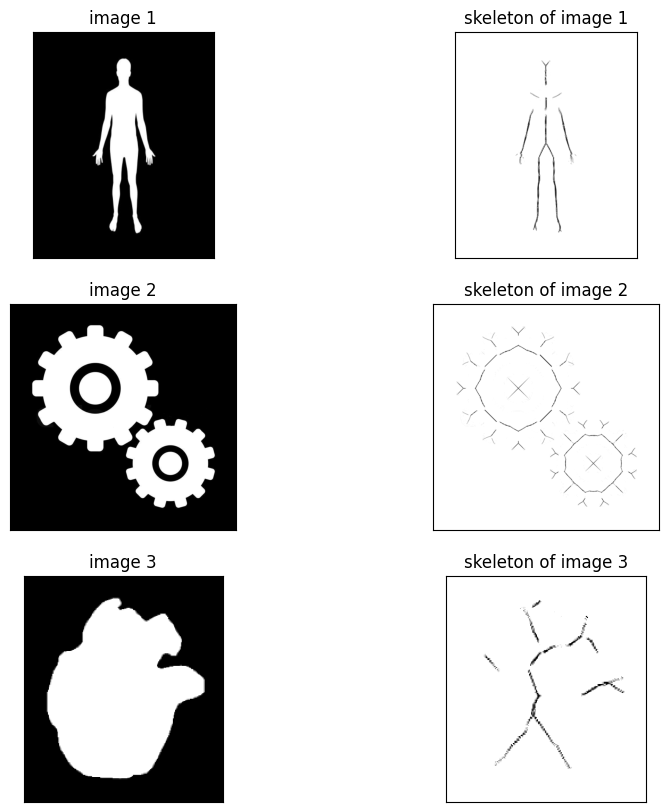

In [5]:
image_list = []
image_dir="images"

image1 = cv2.imread("q8_5.jpg", cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = find_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread("q8_6.png", cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = find_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread("q8_7.png", cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = find_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])


plotter(image_list, 3, 2, True, 10, 10, 'Q8-a')

In [6]:
def reconstruct_skeleton(image, params):

    se = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
    result = np.zeros(image.shape, np.uint8)

    for i, sk in params:
      img = cv2.dilate(sk, se, iterations = i)
      result = cv2.bitwise_or(result, img)

    return result

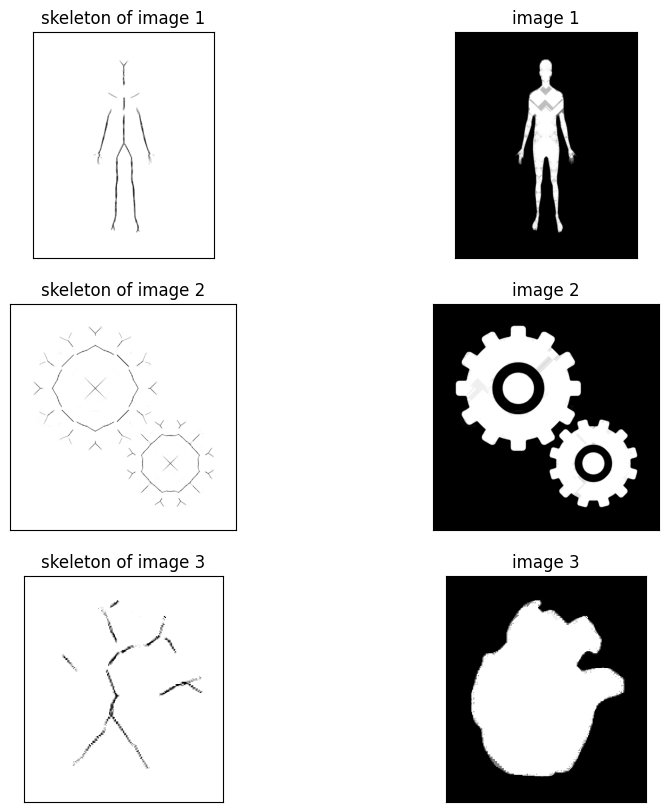

In [7]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([reconstruct_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([reconstruct_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([reconstruct_skeleton(image3_skeleton, params3), 'image 3', 'img'])


plotter(image_list, 3, 2, True, 10, 10, 'Q8-b')